## Reading the data file

In [2]:
df=pd.read_csv('auction.csv')
df

<IPython.core.display.Javascript object>

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


# Basics

### Shape of our data

In [3]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  10681
Number of columns:  9


### Finding if there are any null values in the data set

In [4]:
df.isnull().sum()

auctionid        0
bid              0
bidtime          0
bidder          16
bidderrate      11
openbid          0
price            0
item             0
auction_type     0
dtype: int64

### Checking for the duplicate values

In [5]:
df.duplicated().sum()

0

### Finding the statistical data

In [6]:
df.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price
count,1.068100e+04,10681.000000,10681.000000,10670.000000,10681.000000,10681.000000
mean,4.136148e+09,207.586109,3.979628,31.936739,52.246256,335.043589
std,2.489918e+09,323.037396,2.353386,120.594074,168.453245,433.566009
min,1.638844e+09,0.010000,0.000567,-4.000000,0.010000,26.000000
25%,3.015329e+09,72.000000,1.949931,1.000000,1.000000,186.510000
50%,3.020526e+09,140.000000,4.140833,5.000000,4.990000,228.490000
75%,8.212136e+09,210.000000,6.448060,21.000000,50.000000,255.000000
max,8.215611e+09,5400.000000,6.999990,3140.000000,5000.000000,5400.000000


## Value Counts

In [7]:
#bidder
bidders_count=np.array(df['bidder'].value_counts())
len(bidders_count)

<IPython.core.display.Javascript object>

3387

#     
#
#
#
#

# Finding the maximum and minimum bid
#### Max product details analysis

In [8]:
max_bid=df['bid'].idxmax()
max_bid

760

In [9]:
product_max = df['item'][max_bid]
bid_price_max=df['bid'][max_bid]

### Max Product Details are:

In [10]:
print(f'Most expensive product for auction is {product_max} for bid price {bid_price_max}')

Most expensive product for auction is Cartier wristwatch for bid price 5400.0


#### Min product details analysis

In [11]:
min_bid=df['bid'].idxmin()
min_bid

4070

In [12]:
product_min = df['item'][min_bid]
bid_price_min=df['bid'][min_bid]

### Min Product Details are:

In [13]:
print(f'Cheapest product for auction is {product_min} for bid price {bid_price_min}')

Cheapest product for auction is Palm Pilot M515 PDA for bid price 0.01


#     
#
#
#
#

# Profitable Auctions

In [14]:
list = []
for i in range(len(df)):
    if df['bid'][i]<df['price'][i]:
        list.append([df['auctionid'][i],df['bid'][i],df['bidtime'][i],df['bidder'][i],df['bidderrate'][i],df['openbid'][i],df['price'][i],df['item'][i],df['auction_type'][i]])

## Creating new Data Table for profitable items

In [15]:
profitable_df=pd.DataFrame(list)
profitable_df.set_axis(['auctionid','bid','bidtime','bidder','bidderrate','openbid','price','item','auction_type'], axis='columns', inplace=True)
profitable_df

<IPython.core.display.Javascript object>

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1639453840,1.0,0.355856,bfalconb,2.0,1.00,355.00,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
9962,8214889177,50.0,5.013889,bax3family,3.0,0.01,90.01,Xbox game console,7 day auction
9963,8214889177,61.0,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
9964,8214889177,76.0,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
9965,8214889177,90.0,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction


## Exporting all data to a new csv file

In [16]:
profitable_df.to_csv('Profitable Data.csv')

#     
#
#
#
#

# Representing data through graphs

In [17]:
correlation=df.drop(['auctionid','bidtime'],axis=1).corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

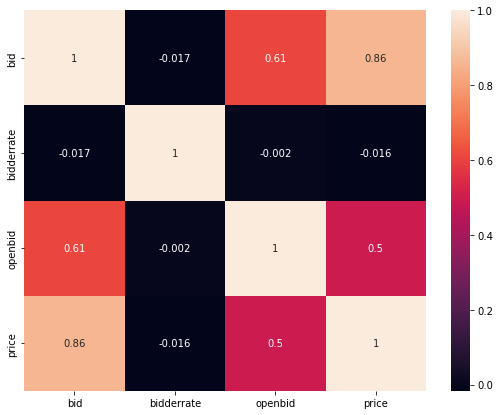

In [18]:
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True)

### Checking if the item is sold profitably

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

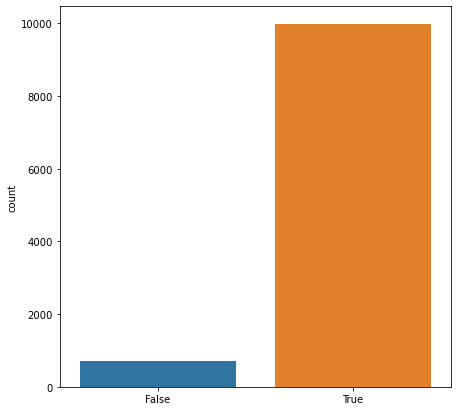

In [19]:
plt.figure(figsize=(7,7))
sns.countplot(df['bid']<df['price'])

### Analyzing bid data through graph

<IPython.core.display.Javascript object>

<AxesSubplot:>

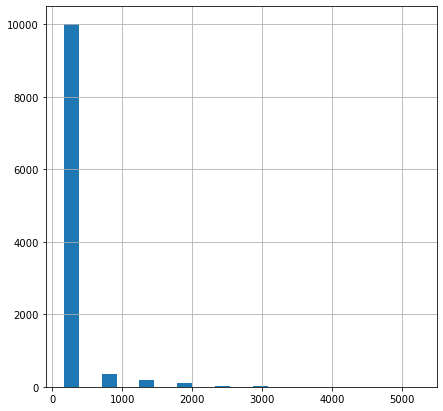

In [20]:
plt.figure(figsize=(7,7))
df['bid'].hist(rwidth=.4)

In [21]:
df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


In [22]:
list2=[]
for i in range(len(df)):
    x=df['price'][i]-df['bid'][i]
    list2.append(x)
list2
pos_count=0
neg_count=0
neutral=0
for num in list2:
    if num >= 0:
        pos_count += 1
    elif num==0:
        neutral += 1
    else:
        neg_count += 1

In [23]:
print(f'Number of profitable items are {pos_count}, number of non-profitable items are {neg_count} and number of neutral items are {neutral}')

Number of profitable items are 10679, number of non-profitable items are 2 and number of neutral items are 0
